In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib
import mnist_vae_lib
import common_utils

# Load data

In [2]:
train_set, test_set = mnist_data_lib.load_mnist_data()

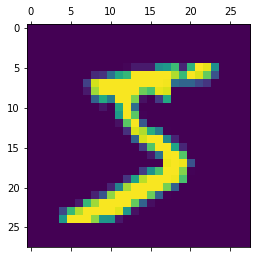

In [3]:
plt.matshow(train_set.train_data[0])

In [4]:
slen = train_set.train_data[0].shape[0]

# Get data loaders

In [5]:
batchsize = 20

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [6]:
for batch_idx, d in enumerate(train_loader):
    data = d
    break

# Define VAE

In [7]:
latent_dim = 5
n_classes = 10

In [8]:
vae = mnist_vae_lib.HandwritingVAE(latent_dim = latent_dim, 
                                    n_classes = n_classes)

In [9]:
# Load results

enc_file = "../mnist_vae_results_aws/mnist_vae_enc_final"
dec_file = '../mnist_vae_results_aws/mnist_vae_dec_final'

vae.encoder.load_state_dict(torch.load(enc_file,
                               map_location=lambda storage, loc: storage))

vae.decoder.load_state_dict(torch.load(dec_file,
                               map_location=lambda storage, loc: storage))

vae.eval()

HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)

In [10]:
print(vae.parameters)

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=19, bias=True)
  )
  (decoder): MLPConditionalDecoder(
    (fc1): Linear(in_features=15, out_features=784, bias=True)
    (fc2): Linear(in_features=784, out_features=500, bias=True)
    (fc3): Linear(in_features=500, out_features=1568, bias=True)
  )
)>


In [11]:
trainloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=train_set, 
                                                       propn_sample=0.001)

testloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=test_set, 
                                                       propn_sample=0.001)

In [12]:
num_images = train_loader.dataset.__len__()

In [13]:
vae.eval_vae(trainloader_subs)

tensor(-11.3608)

In [14]:
vae.eval_vae(testloader_subs)

tensor(-9.9286)

In [15]:
latent_means, latent_std, latent_samples, class_weights = \
    vae.encoder_forward(data[0])

In [50]:
true_class_labels = data[1].numpy()

In [55]:
true_class_weights_np = np.zeros(class_weights.shape)
true_class_weights_np[np.arange(class_weights.shape[0]),
                true_class_labels] = 1

class_weights = torch.Tensor(true_class_weights_np)

In [40]:
one_hot_z = torch.zeros((data[0].size()[0], n_classes))
one_hot_z[:, 3] = 1.0
image_mean, image_std = vae.decoder(latent_samples, one_hot_z)

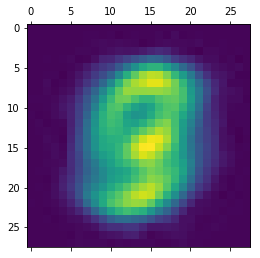

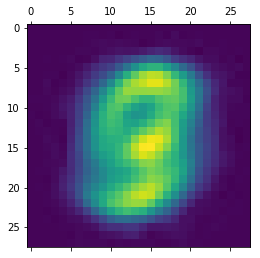

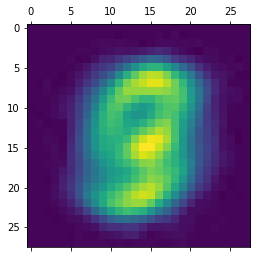

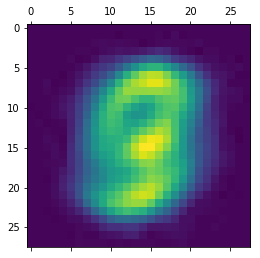

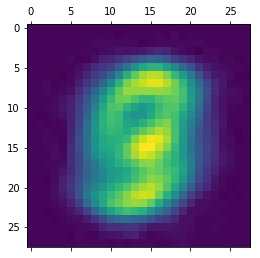

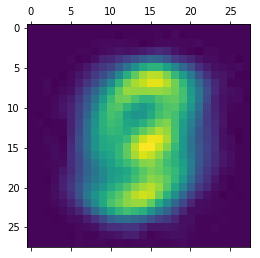

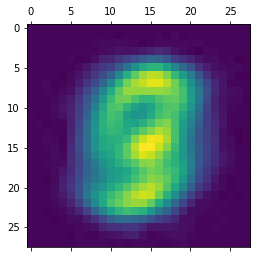

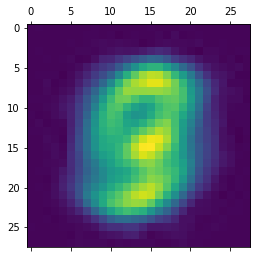

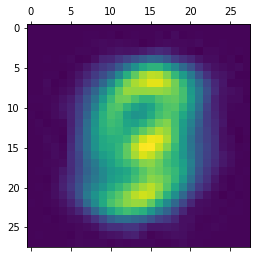

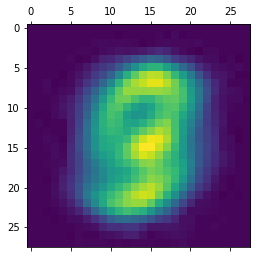

In [41]:
for i in range(10): 
    plt.matshow(image_mean[i, :, :].detach())

In [28]:
image_mu, image_std = vae.decoder_forward(latent_means, torch.ones(batchsize) * 3)

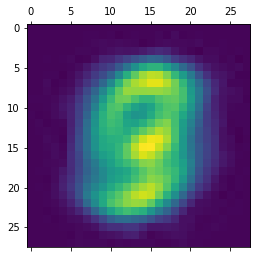

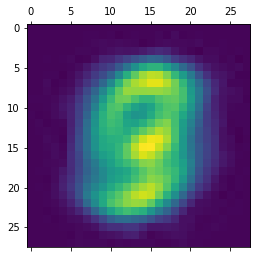

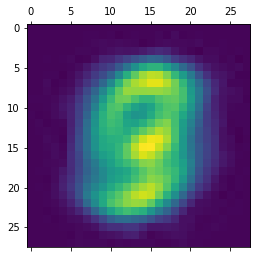

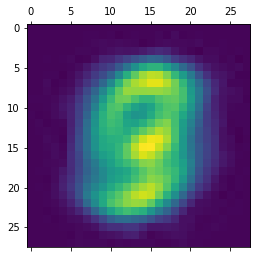

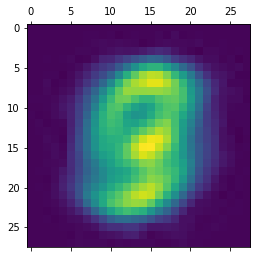

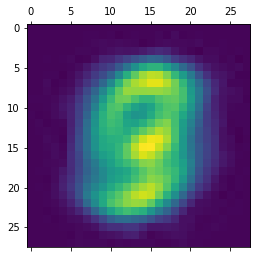

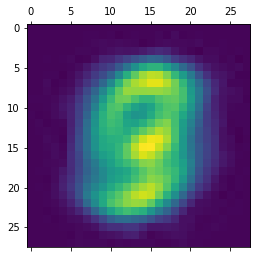

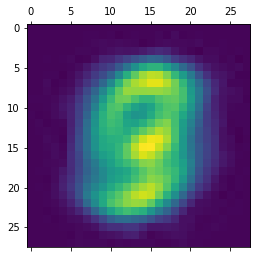

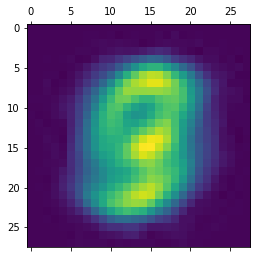

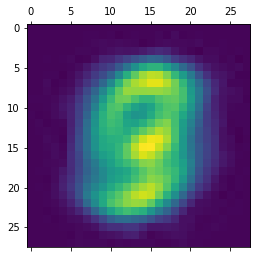

In [29]:
for i in range(10): 
    plt.matshow(image_mu[i, :, :].detach())

In [16]:
class_weights

tensor([[ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  0.0333,  0.0693,  0.1129,  0.1649,  0.1140,  0.1635,
          0.1049,  0.1004,  0.0350],
        [ 0.1018,  

In [17]:
latent_std

tensor(1.00000e-03 *
       [[ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,  3.5402],
        [ 5.6581,  3.7329,  4.8208,  3.0563,

In [18]:
z_ind = torch.argmax(class_weights, dim = 1)

one_hot_z = common_utils.get_one_hot_encoding_from_int(z_ind, vae.encoder.n_classes)

In [19]:
one_hot_z

tensor([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  

In [20]:
image_mean, image_std = vae.decoder(latent_samples, one_hot_z)

(array([5398., 1222., 1096.,  702.,  742.,  625.,  595.,  731., 1098.,
        3471.]),
 array([0.00106952, 0.046598  , 0.09212648, 0.13765496, 0.18318344,
        0.22871192, 0.2742404 , 0.31976888, 0.36529736, 0.41082584,
        0.45635432]),
 <a list of 10 Patch objects>)

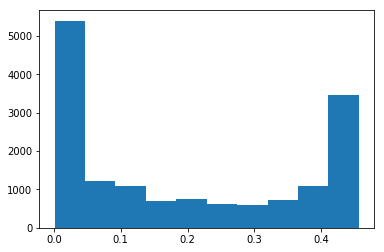

In [21]:
plt.hist(image_std.detach().numpy().flatten())

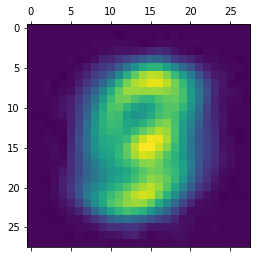

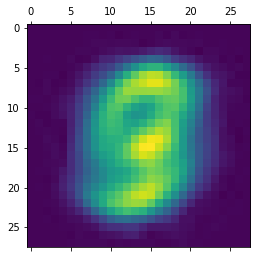

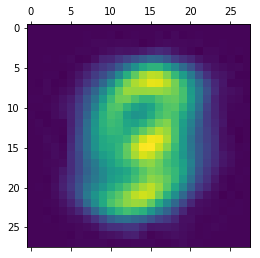

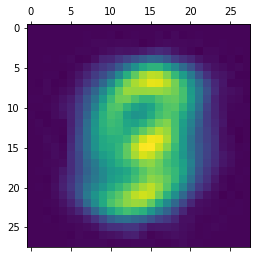

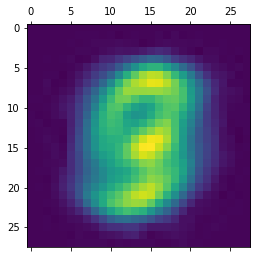

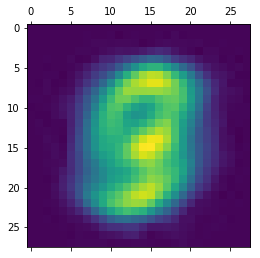

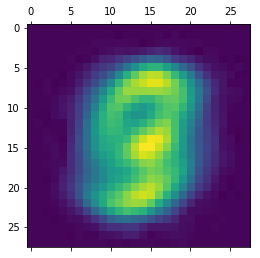

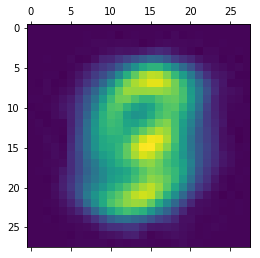

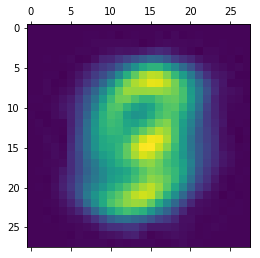

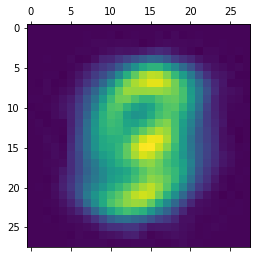

In [22]:
for i in range(10): 
    plt.matshow(image_mean[i, :, :].detach())

In [12]:
### Check things run

In [13]:
# check encoder 

latent_means, latent_std, free_class_weights = \
    vae.encoder(data[0])
    
assert latent_means.shape[0] == batchsize
assert latent_means.shape[1] == latent_dim

assert latent_std.shape[0] == batchsize
assert latent_std.shape[1] == latent_dim

assert free_class_weights.shape[0] == batchsize
assert free_class_weights.shape[1] == n_classes 


In [14]:
z_ind = torch.argmax(free_class_weights, dim = 1)

In [15]:
z_ind

tensor([ 2,  2,  2,  2,  2,  2,  5,  2,  9,  9,  2,  2,  9,  2,
         2,  2,  2,  2,  9,  2])

In [16]:
# check one hot encoding 

one_hot_z = common_utils.get_one_hot_encoding_from_int(z_ind, 10)

seq = torch.Tensor([i for i in range(n_classes)])

for n in range(batchsize): 
    foo = one_hot_z[n, :]
    
    assert foo[z_ind[n]] == 1.
    assert sum(foo) == 1.

In [17]:
image_mean, image_std = vae.decoder(latent_means, one_hot_z)
assert image_mean.shape[0] == batchsize
assert image_mean.shape[1] == slen
assert image_mean.shape[1] == slen

In [18]:
# check loss goes through

In [19]:
vae.loss(data[0])

tensor(1656.3547)

# Check gradient works 

In [20]:
def get_vae_params(vae): 
    vae_params = np.array([])
    for f in vae.parameters(): 
        vae_params = np.append(vae_params, f.detach().numpy().flatten())
    return vae_params


In [21]:
vae_params0 = get_vae_params(vae)

In [22]:
assert np.any(np.isnan(vae_params0)) == False

In [23]:
optimizer = optim.Adam(vae.parameters(), lr=0.01)
optimizer.zero_grad()

In [24]:
loss = vae.loss(data[0])
print(loss)

tensor(1655.6113)


In [25]:
loss.backward()
optimizer.step()

In [26]:
vae_params1 = get_vae_params(vae)

In [27]:
assert np.any(np.isnan(vae_params1)) == False

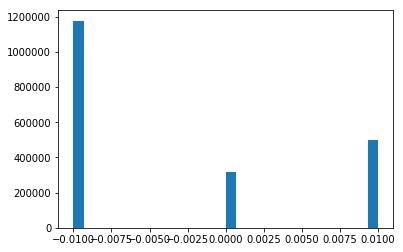

In [28]:
plt.hist(vae_params1 - vae_params0, bins = 30); 

In [29]:
loss = vae.loss(data[0])

In [30]:
assert np.isfinite(loss.detach().numpy())

# Test training

In [31]:
from torch.utils.data.sampler import Sampler

In [32]:
trainloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=train_set, 
                                                       propn_sample=0.001)

testloader_subs = mnist_data_lib.subsample_mnist_data(batch_size=10, 
                                                       data_set=test_set, 
                                                       propn_sample=0.001)

In [33]:
len(train_loader.dataset)

60000

In [34]:
vae.train_module(trainloader_subs, testloader_subs, 
                 n_epoch = 5, 
                print_every = 2, 
                outfile = './test')

batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 1
  * init train recon loss: 0.5448997021;
  * init test recon loss: 0.5487380624;
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
[1] loss: 0.1817598045  	[0.4 seconds]
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
[2] loss: 0.02134082653  	[0.5 seconds]
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 1
  * train recon loss: 0.005951912608;
  * test recon loss: 0.005426646676;
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
[3] loss: 0.003752589924  	[0.6 seconds]
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
[4] loss: 0.002013224876  	[0.7 seconds]
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 1
  * train recon loss: 0.001051260275;
  * test recon loss: 0.001159751904;
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
[5] loss: 0.0006263965624  	[0.6 seconds]
writing the encoder parameters to ./test_enc_final

writing the decoder parameters to ./test_dec_final



In [35]:
# check reloading

In [36]:
reload_vae = vae = mnist_vae_lib.HandwritingVAE(latent_dim = latent_dim, 
                                    n_classes = n_classes)

In [37]:
enc_file = "./test_enc_final"
dec_file = './test_dec_final'

reload_vae.encoder.load_state_dict(torch.load(enc_file,
                               map_location=lambda storage, loc: storage))

reload_vae.decoder.load_state_dict(torch.load(dec_file,
                               map_location=lambda storage, loc: storage))


In [38]:
reload_vae.eval_vae(trainloader_subs)

batch 1
batch 2
batch 3
batch 4
batch 5
batch 6


tensor(1.00000e-05 *
       7.9501)